In [3]:
import pickle
from pathlib import Path

import bz2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder

In [2]:
with bz2.open('11_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,2220AF19-3E1C-EB11-B444-005056A7539A,0,1826606,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,F102DC7D-261C-EB11-B444-005056A7539A,8293317,C560312,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,4632D419-2C1C-EB11-B444-005056A7539A,0,3225041,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,706B9E66-251C-EB11-B444-005056A7539A,0,B700679,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,71F3E090-2A1C-EB11-B444-005056A7539A,0,7024046,61,271,2.0,87.80,False,1304277,10424967


AHA! I found you, sneaky boy!

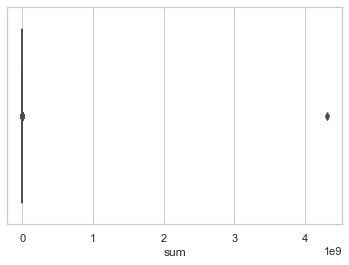

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.groupby(["id_order"])["sum"].sum())

Another one

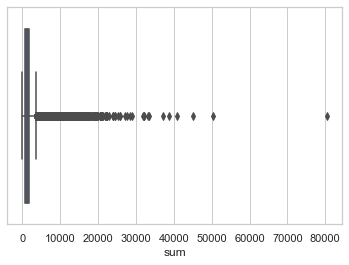

In [12]:
x = df.groupby(["id_order"])["sum"].sum()
ax = sns.boxplot(x=x[x < 10e6])

In [16]:
df_imposter = df[df['id_order'] == 9881362]
print(df_imposter.shape)
df_imposter.head()

(50, 11)


,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
40038606,2020-11-26 12:40:02,EDB7CD36-CC2F-EB11-B444-005056A7539A,9881362,8912674,23074,18878,6.0,1608.0,False,1577248,21745256
40038607,2020-11-26 12:40:02,EDB7CD36-CC2F-EB11-B444-005056A7539A,9881362,8912674,23074,18878,6.0,1608.0,False,1577248,21745256
40038608,2020-11-26 12:40:02,EDB7CD36-CC2F-EB11-B444-005056A7539A,9881362,8912674,23074,18878,6.0,1608.0,False,1577248,21745256
40038609,2020-11-26 12:40:02,EDB7CD36-CC2F-EB11-B444-005056A7539A,9881362,8912674,23074,18878,6.0,1608.0,False,1577248,21745256
40038610,2020-11-26 12:40:02,EDB7CD36-CC2F-EB11-B444-005056A7539A,9881362,8912674,23074,18878,6.0,1608.0,False,1577248,21745256


Also there are orders with 0 sum! Looks like we got a hackers

In [23]:
zero_sum_ids = x[x == 0].index
zero_sum_ids

Int64Index([ 8338963,  8487077,  8705934,  8732843,  8993724,  9111321,
             9852992,  9853440, 10122652, 10122997, 10124818, 10125348,
            10125813, 10126647, 10127287, 10198296, 10198535],
           dtype='int64', name='id_order')

Let's look for one hacker's history. He found a way to not pay at 2020-11-08!

In [39]:
hacker_id_card = df[df['id_order'] == zero_sum_ids[3]].id_card.values[0]
df[df['id_card'] == hacker_id_card]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
11527984,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,647,13567,1.000,0.00,False,1940694,14398847
11528068,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,782,186,1.000,0.00,False,1940694,14398847
11528284,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,15089,186,1.000,0.00,False,1940694,14398847
11528567,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,16645,17210,0.465,0.00,False,1940694,14398847
11528825,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,18940,16612,0.570,0.00,False,1940694,14398847
11528865,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,19417,18694,0.396,0.00,False,1940694,14398847
11529141,2020-11-08 18:42:32,9D6393BB-D921-EB11-B444-005056A7539A,8732843,c657010,21335,16860,0.620,0.00,False,1940694,14398847
25618628,2020-11-17 19:46:51,59534B39-F528-EB11-B444-005056A7539A,9305160,c657010,647,13567,1.000,2.84,False,1940694,8169306
25619186,2020-11-17 19:46:51,59534B39-F528-EB11-B444-005056A7539A,9305160,c657010,16591,-9999,1.000,65.26,False,1940694,8169306
25619210,2020-11-17 19:46:51,59534B39-F528-EB11-B444-005056A7539A,9305160,c657010,16645,16102,1.078,64.23,False,1940694,8169306


In [41]:
x = df.groupby(["id_order"])["quantity"].max()

New candidate for a prison. Let's investigate

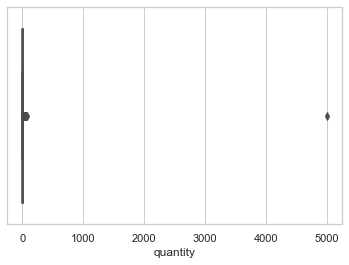

In [42]:
ax = sns.boxplot(x=x)

In [43]:
x[x > 4000]

id_order
0    5000.0
Name: quantity, dtype: float64

No, it is a misstake. These are good people

In [46]:
df[df['quantity'] == 5000]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
227471,2020-11-01 11:40:41,C0BACB57-1E1C-EB11-B444-005056A7539A,0,5606859,1113,-9999,5000.0,0.0,False,1045450,17630264
239479,2020-11-01 12:36:26,4B1F96F4-251C-EB11-B444-005056A7539A,0,A053366,1113,-9999,5000.0,0.0,False,1704832,6870079
321062,2020-11-01 16:24:19,C0F08269-461C-EB11-B444-005056A7539A,0,1150256,1113,-9999,5000.0,0.0,False,212944,17649360
381021,2020-11-01 11:25:12,530DCC15-1C1C-EB11-B444-005056A7539A,0,0712297,1113,-9999,5000.0,0.0,False,139270,7596611
400626,2020-11-01 16:41:20,AB505976-481C-EB11-B444-005056A7539A,0,3341169,1113,-9999,5000.0,0.0,False,582203,15672188
...,...,...,...,...,...,...,...,...,...,...,...
46189661,2020-11-30 14:07:25,BC3D6FE5-FC32-EB11-B444-005056A7539A,0,8908654,1113,-9999,5000.0,0.0,False,1576469,17219605
46238006,2020-11-30 19:51:19,EBA01C2F-2D33-EB11-B444-005056A7539A,0,3409999,1113,-9999,5000.0,0.0,False,593671,21553474
46411907,2020-11-30 14:54:26,69E4A5C2-0333-EB11-B444-005056A7539A,0,3210216,1113,-9999,5000.0,0.0,False,560750,9686850
46462107,2020-11-30 23:06:09,F490D6CA-4733-EB11-B444-005056A7539A,0,2951010,1113,-9999,5000.0,0.0,False,516678,22372786


In [48]:
df['is_green'].value_counts()

False    42764237
True      3732384
Name: is_green, dtype: int64

<AxesSubplot:xlabel='quantity', ylabel='sum'>

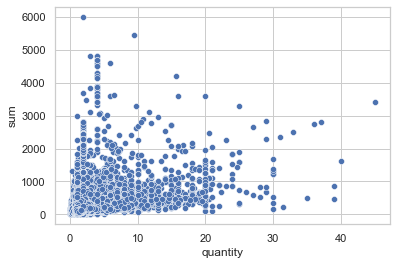

In [52]:
x = df.groupby(["id_order"])["quantity"].mean()

y = df.groupby(["id_order"])["sum"].mean()

sns.scatterplot(x=x, y=y)